In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
pth = os.path.join('..', '..')
pth_data = os.path.join(pth, 'data')
pth_in = os.path.join(pth_data, 'modeling', 'inputs')
pth_out = os.path.join(pth, 'figures', 'preprocessing', 'processed', 'CCCA')

In [3]:
adata = sc.read_h5ad(os.path.join(pth_in, 'CCCA_malignant.h5ad'))
adata.obsm['X_umap'] = adata.obs[['umap1', 'umap2']].astype(float).values
adata

AnnData object with n_obs × n_vars = 1434229 × 856
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'celltype', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'cores', 'post_op_gleason_score', 'margin

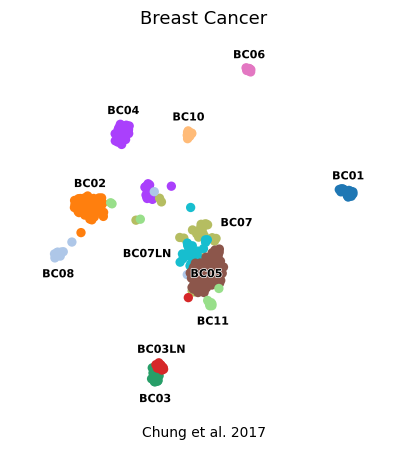

In [18]:
name = 'Data_Chung2017_Breast'
adata_plt = adata[adata.obs.Name == name].copy()

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata_plt, color = 'sample', size = 180,
           legend_loc = 'on data', legend_fontsize = 8,
           na_in_legend = False, legend_fontoutline = 1,
           frameon = False, show = False, ax = ax)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0] - 3.75, ylim[1] + 4)
ax.set_xlim(xlim[0] - 5, xlim[1] + 5)

pos_dict = {
    'BC01'   : (0, 3.25),
    'BC02'   : (0, 4),
    'BC03'   : (0, -4),
    'BC03LN' : (0, 3.33),
    'BC04'   : (-.5, 5.75),
    'BC05'   : (-.5, -.25),
    'BC06'   : (0, 2.75),
    'BC07'   : (6, 2),
    'BC07LN' : (-7.33, -.75),
    'BC08'   : (0, -4),
    'BC10'   : (0, 3.25),
    'BC11'   : (.5, -3.75)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(adata_plt.obs.Disease.cat.categories[0], size = 13)
ax.text(.34, -.05, adata_plt.obs.Title.cat.categories[0], transform = ax.transAxes)
fn = os.path.join(pth_out, f'{name}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

In [ ]:
name = 'Data_Li2017_Colorectal'
adata_plt = adata[adata.obs.Name == name].copy()
sample = adata_plt.obs['sample'].str
sample = sample.replace('_tumour', '')
adata_plt.obs['sample'] = sample

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata_plt, color = 'sample', size = 600,
           legend_loc = 'on data', legend_fontsize = 8.25,
           na_in_legend = False, legend_fontoutline = 1,
           frameon = False, show = False, ax = ax)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
dx, dy = 3, 2
ax.set_xlim(xlim[0] - dx, xlim[1] + dx)
ax.set_ylim(ylim[0] - dy, ylim[1] + dy)

pos_dict = {
    'CRC01' : (3, 2.5),
    'CRC02' : (0, -.25),
    'CRC03' : (2.6, 1.9),
    'CRC04' : (-.4, 1.75),
    'CRC05' : (1, .5),
    'CRC06' : (-.25, -.25),
    'CRC07' : (.25, 0),
    'CRC08' : (.1, 0),
    'CRC09' : (.75, .75),
    'CRC10' : (-.5, 3.25)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(adata_plt.obs.Disease.cat.categories[0], size = 13)
ax.text(.39, -.05, adata_plt.obs.Title.cat.categories[0], transform = ax.transAxes)
fn = os.path.join(pth_out, f'{name}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

In [ ]:
name = 'Data_Geistlinger2020_Ovarian'
adata_plt = adata[adata.obs.Name == name].copy()

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata_plt, color = 'sample', size = 200,
           legend_loc = 'on data', legend_fontsize = 9.25,
           na_in_legend = False, legend_fontoutline = 1,
           frameon = False, show = False, ax = ax)
ax.set_ylim(top = ax.get_ylim()[1] + 3)

pos_dict = {
    'T59' : (7.75, 4.5),
    'T76' : (-.25, 4.5),
    'T77' : (-2.6, -.25),
    'T89' : (-.5, 3.5),
    'T90' : (2, 3.6)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(adata_plt.obs.Disease.cat.categories[0], size = 13)
ax.text(.3, -.05, adata_plt.obs.Title.cat.categories[0], transform = ax.transAxes)
fn = os.path.join(pth_out, f'{name}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

In [ ]:
name = 'Data_Puram2017_Head-and-Neck'
adata_plt = adata[adata.obs.Name == name].copy()

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata_plt, color = 'sample', size = 150,
           legend_loc = 'on data', legend_fontsize = 9.5,
           na_in_legend = False, legend_fontoutline = 1,
           frameon = False, show = False, ax = ax)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(right = xlim[1] - 10)
ax.set_ylim(ylim[0] + 46, ylim[1] - .5)

label_dict = {
    '7'  : '',
    '8'  : '',
    '9'  : '',
    '10' : '',
    '12' : '',
    '13' : ''}

pos_dict = {
    '5'  : (0, 3.33),
    '6'  : (-.85, 2.25),
    '16' : (.33, 2.25),
    '17' : (.7, 3.5),
    '18' : (-1, 3.5),
    '22' : (.25, 2.5),
    '24' : (-.25, -1.75),
    '25' : (.25, 3.25),
    '26' : (.66, 3.5),
    '28' : (.33, 3)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(adata_plt.obs.Disease.cat.categories[0], size = 13)
ax.text(.34, -.05, adata_plt.obs.Title.cat.categories[0], transform = ax.transAxes)
fn = os.path.join(pth_out, f'{name}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

In [ ]:
name = 'Data_Maynard2020_Lung'
adata_plt = adata[adata.obs.Name == name].copy()
sample = adata_plt.obs['sample'].str
sample = sample.replace('LT_', '')
adata_plt.obs['sample'] = sample

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata_plt, color = 'sample', size = 100,
           legend_loc = 'on data', legend_fontsize = 8,
           na_in_legend = False, legend_fontoutline = 1,
           frameon = False, show = False, ax = ax)
ylim = ax.get_ylim()
ax.set_ylim(ylim[0] + 33, ylim[1] - 2)

label_dict = {
    'S01' : '',
    'S07' : '',
    'S08' : '',
    'S16' : '',
    'S23' : '',
    'S28' : '',
    'S34' : '',
    'S35' : '',
    'S42' : '',
    'S48' : '',
    'S49' : '',
    'S51' : '',
    'S52' : '',
    'S54' : '',
    'S55' : '',
    'S65' : '',
    'S72' : '',
    'S74' : '',
    'S75' : '',
    'S78' : '',
    'S79' : '',
    'S80' : '',
    'S81' : '',
    'S82' : ''}

pos_dict = {
    'S05' : (.25, 1.5),
    'S11' : (0, 1.5),
    'S41' : (0, -1.4),
    'S47' : (-.25, 1.35),
    'S50' : (0, 1.33),
    'S53' : (-.25, 1.25),
    'S56' : (-3.33, 0),
    'S57' : (0, 1.5),
    'S58' : (0, 1.33),
    'S63' : (.25, 0),
    'S66' : (0, 1.75),
    'S69' : (0, 2.25),
    'S71' : (3.7, .4)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(adata_plt.obs.Disease.cat.categories[0], size = 13)
ax.text(.325, -.05, adata_plt.obs.Title.cat.categories[0], transform = ax.transAxes)
fn = os.path.join(pth_out, f'{name}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

In [ ]:
# name = 'Data_Venteicher2017_Brain'
# adata_plt = adata[adata.obs.Name == name].copy()

# fig, ax = plt.subplots(1, 1, figsize = (5, 5))
# sc.pl.umap(adata_plt, color = 'latent_z', size = 80,
#            cmap = cmap, vmin = vmin, vmax = vmax,
#            frameon = False, colorbar_loc = None,
#            show = False, ax = ax)
# sc.pl.umap(adata_plt, color = 'sample', size = 80, alpha = 0,
#            legend_loc = 'on data', legend_fontsize = 8,
#            na_in_legend = False, legend_fontoutline = 1,
#            frameon = False, show = False, ax = ax)
# ax.set_ylim(top = ax.get_ylim()[1] + 1.5)

# pos_dict = {
#     'MGH42'  : (0, 7.5),
#     'MGH43'  : (0, 4),
#     'MGH44'  : (0, 5.75),
#     'MGH45'  : (0, 5),
#     'MGH56'  : (1.75, 5.25),
#     'MGH57'  : (0, 5.25),
#     'MGH61'  : (0, 7.75),
#     'MGH64'  : (0, 5),
#     'MGH103' : (0, 3),
#     'MGH107' : (0, 5.75)}

# for label in ax.texts:
#     _label_ = label.get_text()
#     x, y = label.get_position()
#     if _label_ in pos_dict:
#         dx, dy = pos_dict[_label_]
#         label.set_position([x + dx, y + dy])

# ax.set_title(adata_plt.obs.Disease.cat.categories[0], size = 13)
# ax.text(.3, -.05, adata_plt.obs.Title.cat.categories[0], transform = ax.transAxes)
# fn = os.path.join(pth_out, f'{name}.pdf')
# plt.savefig(fn, bbox_inches = 'tight')

In [ ]:
# name = 'Data_Gojo2020_Brain'
# adata_plt = adata[adata.obs.Name == name].copy()

# fig, ax = plt.subplots(1, 1, figsize = (5, 5))
# sc.pl.umap(adata_plt, color = 'latent_z', size = 50,
#            cmap = cmap, vmin = vmin, vmax = vmax,
#            frameon = False, colorbar_loc = None,
#            show = False, ax = ax)
# sc.pl.umap(adata_plt, color = 'sample', size = 50, alpha = 0,
#            legend_loc = 'on data', legend_fontsize = 7.25,
#            na_in_legend = False, legend_fontoutline = 1,
#            frameon = False, show = False, ax = ax)
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 12, top + 2)

# label_dict = {
#     'MUV043Nuc1' : 'MUV043Nuc',
#     'MUV043Nuc2' : ''}

# pos_dict = {
#     'BT1030'     : (0, .5),
#     'BT1480Nuc'  : (0, .5),
#     'BT1678'     : (0, -1.5),
#     'MUV006'     : (0, 1.75),
#     'MUV013'     : (0, .5),
#     'MUV021'     : (0, .5),
#     'MUV038'     : (0, -.5),
#     'MUV043'     : (0, 2.25),
#     'MUV043Nuc1' : (2.5, 2.5),
#     'MUV051'     : (0, -1),
#     'MUV052'     : (0, -.5),
#     'MUV053'     : (-3, 1),
#     'MUV056'     : (0, .5),
#     'MUV063'     : (-1.25, -1.75),
#     'MUV068'     : (0, .5),
#     'Peds4'      : (6, -3.5)}

# for label in ax.texts:
#     _label_ = label.get_text()
#     x, y = label.get_position()
#     dx, dy = 0, 5
#     if _label_ in label_dict:
#         label.set_text(label_dict[_label_])
#     if _label_ in pos_dict:
#         dx += pos_dict[_label_][0]
#         dy += pos_dict[_label_][1]
#     label.set_position([x + dx, y + dy])

# ax.set_title(adata_plt.obs.Disease.cat.categories[0], size = 13)
# ax.text(.366, -.05, adata_plt.obs.Title.cat.categories[0], transform = ax.transAxes)
# fn = os.path.join(pth_out, f'{name}.pdf')
# plt.savefig(fn, bbox_inches = 'tight')